In [78]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [279]:
df = pd.read_csv (r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\clean_data.csv')
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
df.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff,credit_card_default
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,...,0,0,0,0,0,0,0,1,0,1
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='credit_card_default', ylabel='count'>

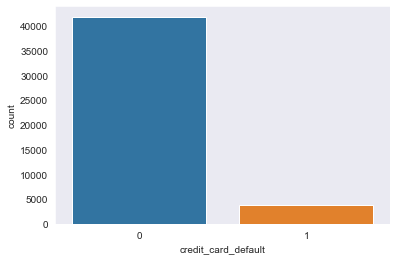

In [80]:
import seaborn as sns
sns.set_style("dark")

sns.countplot(x=y)

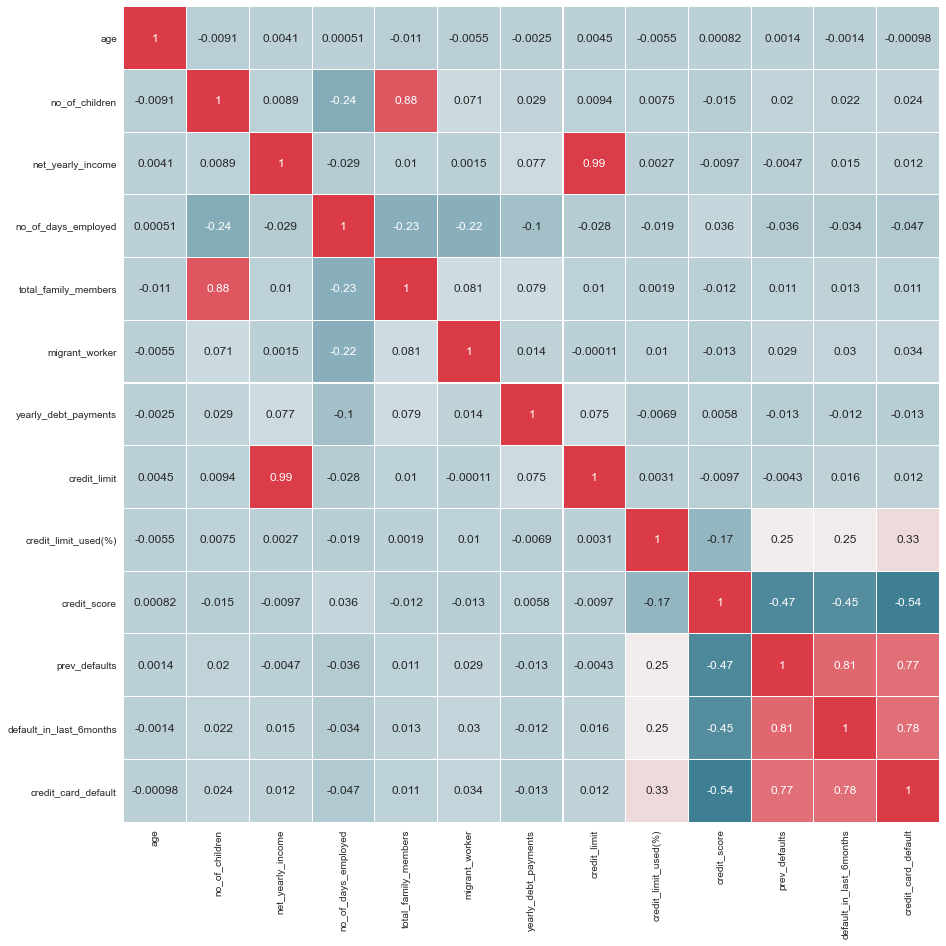

In [81]:
no_one_hot_data = pd.read_csv (r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\training data.csv')

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
        no_one_hot_data.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()

From above clearly prev_defaults, default in last 6 months are most correlated to credit card default

credit limit is correlated to net yearly income

In [296]:
#pd.cut(df.age,bins=[10,30,40,50,60,70,100],labels=['young','30s','40s','50s','60s','70s'])
#df =df.insert(1,'age Group',newsort)
df.head()
df['age_group'] = pd.cut(df['age'], bins=[0, 20,30, 40,50, 60, 100])
df['net_yearly_income_range'] = pd.cut(df['net_yearly_income'], bins=[0, 50000, 100000, 150000, 200000,500000,9999999999999])
df['days_employed_range'] = pd.cut(df['no_of_days_employed'], bins=[0, 500,1000 ,1500, 10000,100000,9999999999999])
df.head(15)

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,...,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff,credit_card_default,age_group,net_yearly_income_range,days_employed_range
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,...,0,0,0,0,1,0,1,"(40, 50]","(100000, 150000]","(500, 1000]"
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,...,0,0,0,0,0,0,0,"(20, 30]","(100000, 150000]","(1500, 10000]"
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,...,0,0,0,0,0,0,0,"(30, 40]","(200000, 500000]","(0, 500]"
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,...,0,0,0,0,0,0,0,"(30, 40]","(100000, 150000]","(10000, 100000]"
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,...,0,0,0,0,0,0,0,"(40, 50]","(200000, 500000]","(1000, 1500]"
5,46,0.0,252765.91,2898.0,2.0,1.0,37046.86,40245.64,19,937.0,...,0,0,0,0,0,0,0,"(40, 50]","(200000, 500000]","(1500, 10000]"
6,38,1.0,262389.20,5541.0,3.0,0.0,50839.39,41311.08,42,733.0,...,0,0,0,0,0,0,0,"(30, 40]","(200000, 500000]","(1500, 10000]"
7,46,1.0,241211.39,1448.0,3.0,0.0,30008.46,32209.22,91,906.0,...,0,0,0,0,0,0,0,"(40, 50]","(200000, 500000]","(1000, 1500]"
8,40,0.0,210091.43,11551.0,2.0,0.0,21521.89,65037.74,14,783.0,...,0,0,0,0,0,0,0,"(30, 40]","(200000, 500000]","(10000, 100000]"
9,39,2.0,207109.13,2791.0,4.0,0.0,9509.10,28425.52,14,666.0,...,0,0,0,0,0,0,0,"(30, 40]","(200000, 500000]","(1500, 10000]"


In [298]:
def data_exploration(grouped_by):
    dfnew = df.groupby('credit_card_default')
    defaulted = dfnew.get_group(1)
    not_defaulted = dfnew.get_group(0)
    kids_def= defaulted.groupby(grouped_by)[grouped_by].count()
    kids_def = kids_def.rename_axis("count")
    kids_def = kids_def.rename(grouped_by+str(' default'))
    kids_no_def= not_defaulted.groupby(grouped_by)[grouped_by].count()
    kids_no_def = kids_no_def.rename_axis("count")
    kids_no_def=kids_no_def.rename(grouped_by+str(' no default'))
    result = (pd.concat([kids_def, kids_no_def], axis=1)).fillna(0)
    df2 = pd.DataFrame(result,columns=[grouped_by+str(' default'),grouped_by+str(' no default')])
    df2.plot.bar(stacked= True)
    


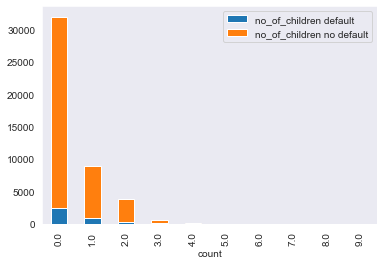

In [299]:
data_exploration('no_of_children')

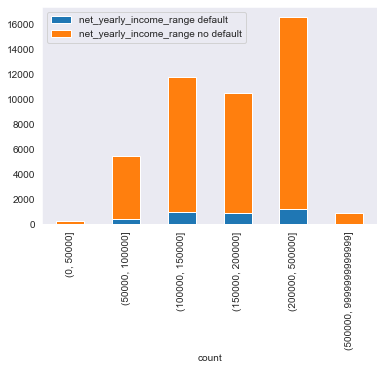

In [293]:
data_exploration('net_yearly_income_range')

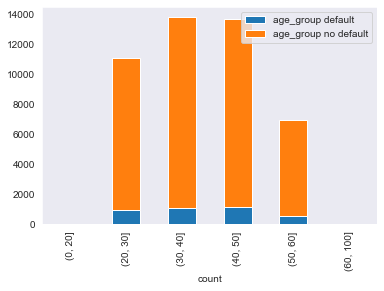

In [297]:
data_exploration('age_group')